<a href="https://colab.research.google.com/github/aalewi/aalewisio.github.io/blob/main/SteelEnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lewis, Aaliyah Date: 4/10/2024**
## Steel Industry Energy Consumption
## Data Society Technical Assessment


Source Data: https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption

**Fields**  
* **Date** Continuous-time data taken on the first of the month  
* **Usage_kWh** Industry Energy Consumption Continuous kWh  
* **Lagging Current** reactive power Continuous kVarh  
* **Leading Current** reactive power Continuous kVarh  
* **CO2** Continuous ppm  
* **NSM** Number of Seconds from midnight Continuous S  
* **Week status** Categorical (Weekend (0) or a Weekday(1))  
* **Day of week** Categorical Sunday, Monday : Saturday  
* **Load Type** Categorical Light Load, Medium Load, Maximum Load

**Background Information**  
Sources:   
[Active Power vs Reactive Power](https://eshop.se.com/in/blog/post/difference-between-active-power-reactive-power-and-apparent-power.html#:~:text=What%20is%20Active%20Power%3F,lights%2C%20light%20bulbs%2C%20whatever.)

[Lagging vs Leading Power](http://www.differencebetween.net/technology/difference-between-leading-and-lagging-power-factor/)

The purpose of this analysis is to understand the impacts of energy consumption on the Steel Industry and determine what factors are important.

**Important Definitions:**  
Active power is the usable or consumed electrical energy in an AC circuit and has units of watt (W) or kilowatt (kW). True power or real power is another name for active power, and it's the kind that actually does useful work.

Reactive power is the alternating current flowing back and forth in an electric circuit. The unit used for reactive power is volt-amperes reactive (VAR) or kilovolt-ampere active (kVAR). R.P., a term also used for imaginary power or wattless power, is the form of energy stored and released by the reactive components within current flowing through an electric circuit--most commonly inductors (inductance) and capacitors (capacitance).

The term ‘lagging power factor’ is used where the load current lags behind the supply voltage.

For capacitive circuits, where the load current leads the supply voltage, the term ‘leading power factor’ is used. It is a property of an electrical circuit that signifies that the load current is capacitive, meaning capacitive loads will cause a leading power factor.




# **Exploratory Analysis**

In [1]:
#import files from drive
from google.colab import files
uploaded = files.upload()

Saving Steel_industry_data.csv to Steel_industry_data (1).csv


In [2]:
#importing packages to explore data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
Steel_Data = pd.read_csv('Steel_industry_data.csv')
Steel_Data.head(n=6)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load


In [3]:
Steel_Data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [4]:
Steel_Data.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

There are no nulls in this dataset so no need to manipulate the data at this stage.

In [5]:
#check variable types in dataset
Steel_Data.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [6]:
#convert date from an object  to a date
Steel_Data['date'] = pd.to_datetime(Steel_Data.date, format='%d/%m/%Y %H:%M')

In [7]:
Steel_Data.dtypes

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
dtype: object

## **Heatmap of Quantitative Data**

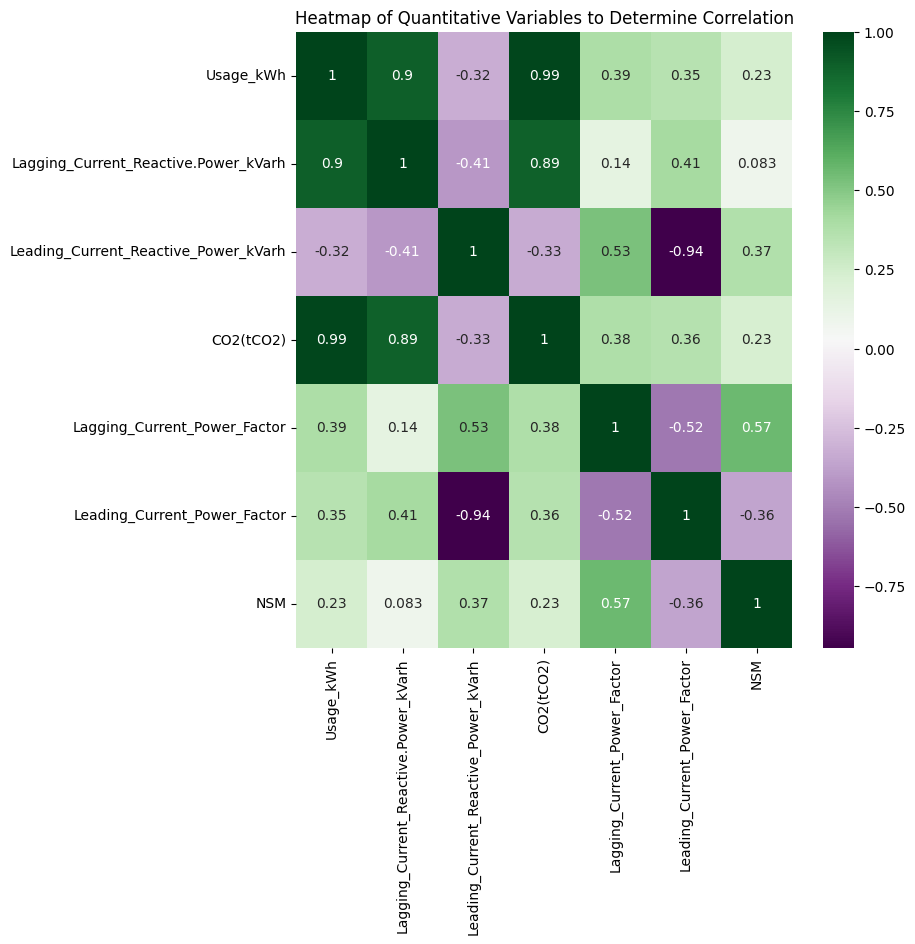

In [8]:
CorrDataframe = Steel_Data.drop(columns=['date','WeekStatus','Day_of_week','Load_Type'])
plt.figure(figsize=(8,8))
ax=sns.heatmap(CorrDataframe.corr(), annot=True, cmap='PRGn')
plt.title("Heatmap of Quantitative Variables to Determine Correlation")
plt.show()

**Values closest to the dark green have a high correlation.**  
Usage_kWh has a high correlation with CO2 and Lagging Current Reactive Power.
Lagging Current Reactive Power has a correlation with CO2 as well.

## **Usage by Day of Week**

Text(0.5, 1.0, 'Usage by Day of the Week')

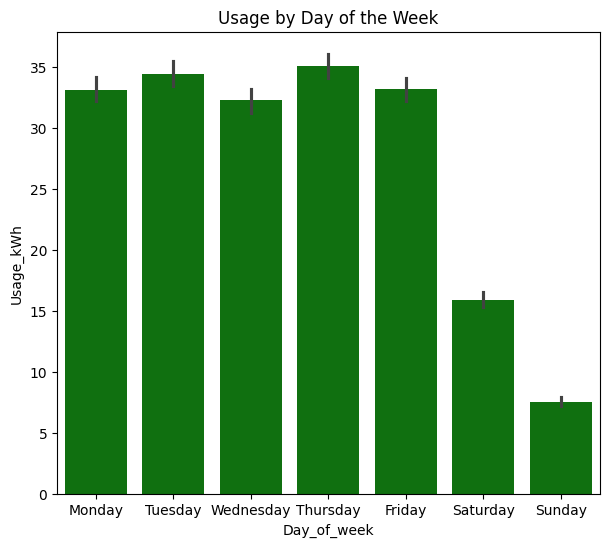

In [9]:
plt.figure(figsize=(7,6))
sns.barplot(data=Steel_Data,x='Day_of_week',y='Usage_kWh',color='green')
plt.title("Usage by Day of the Week")

Saturday and Sunday have lower usage than working days. The usage for working days averages between 30-35.

## **Lagging Reactive Power Correlation with Consumption**

Text(0.5, 1.0, 'Lagging Reactive Power Correlation with Consumption')

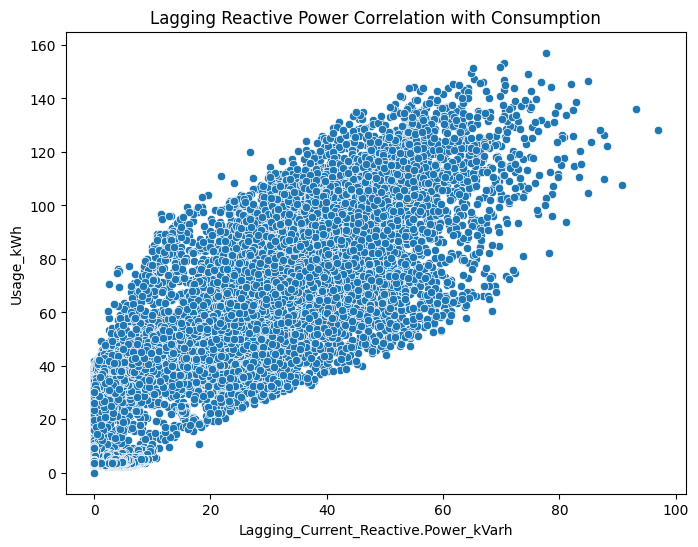

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=Steel_Data,x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh')
plt.title(label="Lagging Reactive Power Correlation with Consumption")

## **CO2 with Consumption**



Text(0.5, 1.0, 'CO2 with Consumption')

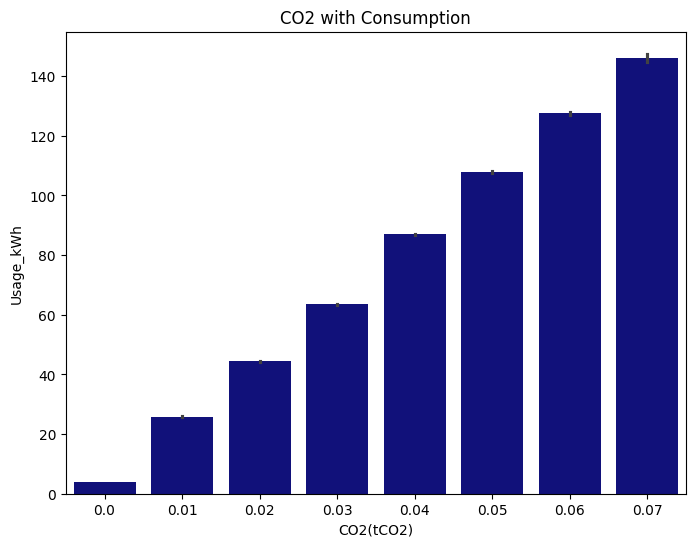

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(data=Steel_Data,x='CO2(tCO2)',y='Usage_kWh',color='darkblue')
plt.title(label="CO2 with Consumption")

## **Load Types**

Text(0.5, 1.0, 'Histogram of Load Types')

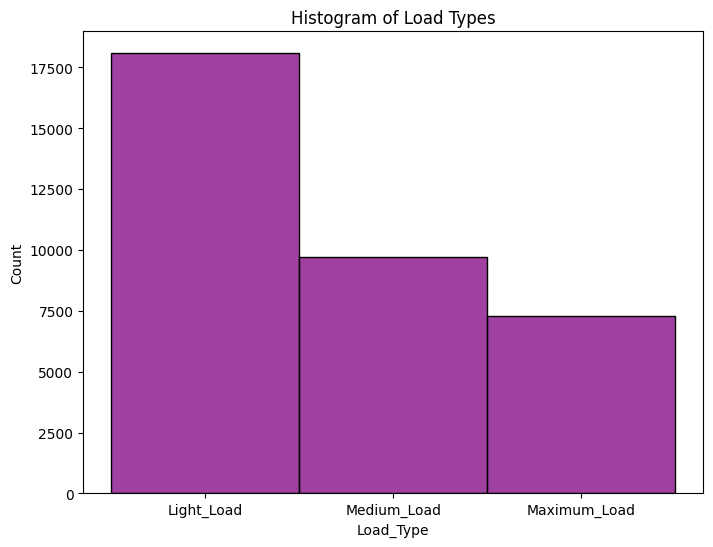

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(data=Steel_Data,x='Load_Type',color='Purple')
plt.title(label="Histogram of Load Types")

Text(0.5, 1.0, 'Consumption by Load Type and Week Status')

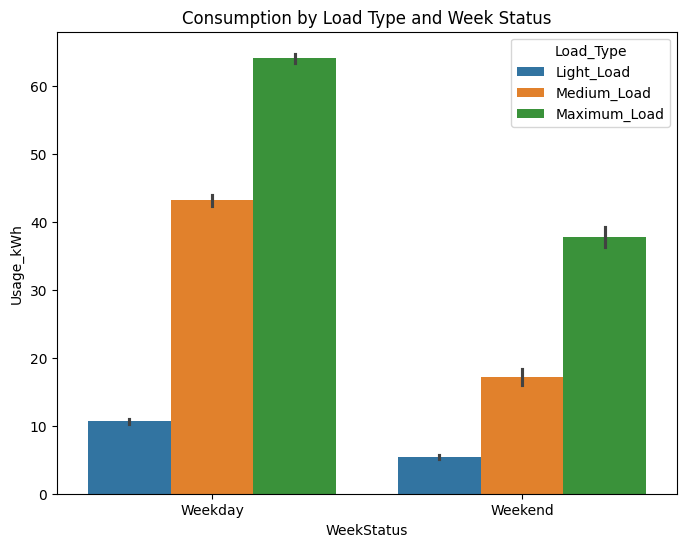

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(data=Steel_Data,x='WeekStatus',y='Usage_kWh',hue='Load_Type')
plt.title(label="Consumption by Load Type and Week Status")

Text(0.5, 1.0, 'Usage by Load Type')

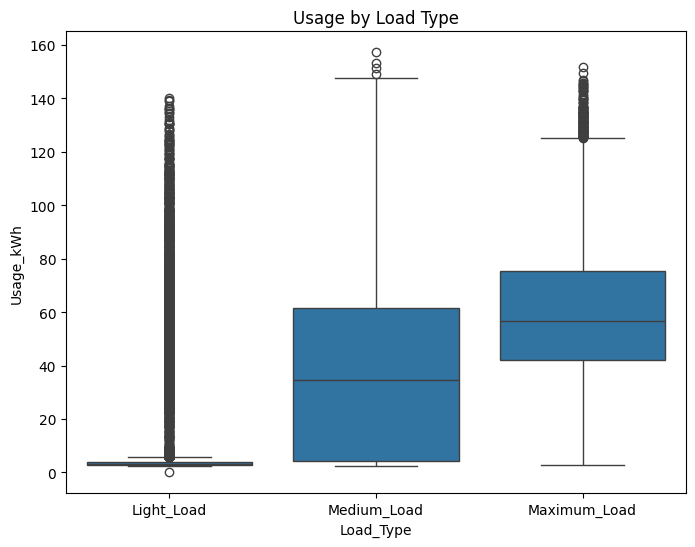

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data=Steel_Data,x='Load_Type',y='Usage_kWh')
plt.title(label="Usage by Load Type")

## **Consumption by Month**

In [15]:
Steel_Data['month'] = Steel_Data['date'].dt.month

In [16]:
#Average Consumption by Month
Steel_Data.groupby('month')['Usage_kWh'].mean()

month
1     42.418780
2     34.039189
3     26.959143
4     27.350625
5     26.565618
6     22.709944
7     27.444358
8     23.037443
9     20.098288
10    28.449479
11    29.936670
12    19.972036
Name: Usage_kWh, dtype: float64

There doesn't seem to be any trends with energy consumption by month but January, February, and November seem to have the highest consumption values.

# **Queries for Business User**

How much active power was consumed on a given day of the week, on average, in a given month 2018?

In [17]:
#insert the number associated with the month
month = 10
#insert the day of the Week with the first letter capitilized
day = 'Monday'

In [18]:
FilteredMonthDay = Steel_Data.loc[(Steel_Data['month']== month) & (Steel_Data['Day_of_week']==day)]

In [19]:
FilteredMonthDay['Usage_kWh'].mean()

36.90820833333334

How much active power was consumed by a specific load type?

In [20]:
#insert the load type
load_type = 'Maximum_Load'

In [21]:
FilteredMonthDay = Steel_Data.loc[(Steel_Data['Load_Type']== load_type)]

In [22]:
FilteredMonthDay['Usage_kWh'].describe()

count    7272.000000
mean       59.265314
std        29.749700
min         2.920000
25%        42.002500
50%        56.630000
75%        75.310000
max       151.670000
Name: Usage_kWh, dtype: float64

# **Predictive Modeling**

## Changes Categorical Fields into Numerical Fields

Change Categorical Data to Numerical Data to Make Easier for Modeling

In [23]:
#Changing Days of Week to be a numerical field
Steel_Data['DayofWeek']=None
Steel_Data.loc[Steel_Data['Day_of_week']=='Sunday','DayofWeek']=1
Steel_Data.loc[Steel_Data['Day_of_week']=='Monday','DayofWeek']=2
Steel_Data.loc[Steel_Data['Day_of_week']=='Tuesday','DayofWeek']=3
Steel_Data.loc[Steel_Data['Day_of_week']=='Wednesday','DayofWeek']=4
Steel_Data.loc[Steel_Data['Day_of_week']=='Thursday','DayofWeek']=5
Steel_Data.loc[Steel_Data['Day_of_week']=='Friday','DayofWeek']=6
Steel_Data.loc[Steel_Data['Day_of_week']=='Saturday','DayofWeek']=7
Steel_Data = Steel_Data.drop(columns='Day_of_week')

In [24]:
#Changing Week Status to be a numerical field
Steel_Data['Week_Status']=None
Steel_Data.loc[Steel_Data['WeekStatus']=='Weekend','Week_Status']=0
Steel_Data.loc[Steel_Data['WeekStatus']=='Weekday','Week_Status']=1
Steel_Data = Steel_Data.drop(columns='WeekStatus')

In [25]:
#Changing Load Type to be a numerical field
Steel_Data['LoadType']=None
Steel_Data.loc[Steel_Data['Load_Type']=='Light_Load','LoadType']=1
Steel_Data.loc[Steel_Data['Load_Type']=='Medium_Load','LoadType']=2
Steel_Data.loc[Steel_Data['Load_Type']=='Maximum_Load','LoadType']=3
Steel_Data = Steel_Data.drop(columns='Load_Type')

In [26]:
Steel_Data.dtypes

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
month                                            int32
DayofWeek                                       object
Week_Status                                     object
LoadType                                        object
dtype: object

In [27]:
#change the new columns to be a numeric column
#Steel_Data['DayofWeek'] = Steel_Data.DayofWeek.astype(int)
#Steel_Data['Week_Status'] = Steel_Data.Week_Status.astype(int)
#Steel_Data['LoadType'] = Steel_Data.LoadType.astype(int)

## Linear Regression

In [28]:
#import packages
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

Performing Backward Regression to determine what fields are important

In [34]:
x = Steel_Data[['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','NSM','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','month','DayofWeek','Week_Status','LoadType']] #independent variables
y = Steel_Data[['Usage_kWh']] #dependent variable

In [35]:
model = sm.OLS(endog=y,exog=x.astype(float)).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:              Usage_kWh   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.883e+05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:32:42   Log-Likelihood:                     -1.0421e+05
No. Observations:               35040   AIC:                                  2.084e+05
Df Residuals:                   35030   BIC:                                  2.085e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

This is a really strong model the R-Squared value is close to 1 and the current value is .988. The p values for all of the independent variables are close to zero except for NSM, so will remove that field to see if the model improves.

In [37]:
#removing NSM from the model
x = Steel_Data[['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','month','DayofWeek','Week_Status','LoadType']]

In [38]:
model = sm.OLS(endog=y,exog=x.astype(float)).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:              Usage_kWh   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          3.204e+05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:38:52   Log-Likelihood:                     -1.0421e+05
No. Observations:               35040   AIC:                                  2.084e+05
Df Residuals:                   35031   BIC:                                  2.085e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [39]:
predictions

0        4.995227
1        4.975503
2        4.891344
3        4.822563
4        4.852073
           ...   
35035    2.854395
35036    3.119712
35037    3.346635
35038    3.384861
35039    3.345996
Length: 35040, dtype: object

Removing NSM had no impact on the model

## **Keras Deep Learning Model**

Sources Used to Help:   
https://keras.io/api/metrics/regression_metrics/
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

In [52]:
x = np.asarray(x).astype('float32')

In [60]:
model = Sequential()  #define model
model.add(Dense(12, input_dim=9, activation="relu")) #setting to 9 due to the amount of independent variables
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='mse', optimizer='rmsprop', metrics=[r2_score], run_eagerly=True) #using r-squared to measure the model
#model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"]) #compile model
model.fit(x,y, epochs=20, batch_size=10)  #training
_, accuracy = model.evaluate(x,y)    #testing
print("Model accuracy: %.2f"% (accuracy*100))
predictions = model.predict(x)     #make predictions
#round the prediction
rounded = [round(x[0]) for x in predictions]

Epoch 1/20
3504/3504 [==============================] - 308s 88ms/step - loss: 1814.7635 - r2_score: -0.8314
Epoch 2/20
3504/3504 [==============================] - 324s 92ms/step - loss: 1814.7620 - r2_score: -0.8528
Epoch 3/20
3504/3504 [==============================] - 341s 97ms/step - loss: 1814.7649 - r2_score: -0.8193
Epoch 4/20
3504/3504 [==============================] - 356s 101ms/step - loss: 1814.7625 - r2_score: -0.8600
Epoch 5/20
3504/3504 [==============================] - 344s 98ms/step - loss: 1814.7640 - r2_score: -0.8853
Epoch 6/20
3504/3504 [==============================] - 370s 106ms/step - loss: 1814.7601 - r2_score: -0.8769
Epoch 7/20
3504/3504 [==============================] - 357s 102ms/step - loss: 1814.7634 - r2_score: -0.8341
Epoch 8/20
3504/3504 [==============================] - 351s 100ms/step - loss: 1814.7603 - r2_score: -0.8277
Epoch 9/20
3504/3504 [==============================] - 356s 102ms/step - loss: 1814.7623 - r2_score: -0.8623
Epoch 10/20
35

The accuracy is low the model needs to be modified.